In [31]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import requests
import json
import matplotlib.pyplot as plt

In [32]:
with open("stadiums_nfl.json") as datafile:
  data = json.load(datafile)
dataframe = pd.DataFrame(data)

In [33]:
dataframe.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-87.61676997...",2017-04-13T04:48:16-04:00,acaab7736b25dbc81055f02ceb96041ea791aab6
1,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-95.41091997...",2017-04-13T04:48:16-04:00,b6b73850e7110b440b11ba18a3d5d18c4a4df399
2,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-94.48388009...",2017-04-13T04:48:16-04:00,dae0180f6c4107dbc52ea4174d0e331e135d8e74
3,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-90.08127999...",2017-04-13T04:48:16-04:00,bb9e7a8c6e5b57f863029203999e7fe3877b50ed
4,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-80.23888995...",2017-04-13T04:48:16-04:00,2c453332d4240ec71639594550cd223109270786


In [34]:
# Store filepath in a variable
file_one = "stadiums_nfl_type.csv"
file_two = "nfl_data.csv"

In [35]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
stadiums_nfl_df = pd.read_csv(file_one, encoding="ISO-8859-1")
stadiums_score_df = pd.read_csv(file_two)

In [36]:
# Show just the header
stadiums_nfl_df.head()

,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR 1,COLOR 2
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow
1,Oakland,Oakland Raiders,Open,63026.0,37.75233,-122.19990,West,silver,NaN
2,San Diego,San Diego Chargers,Open,71294.0,32.78322,-117.11976,West,gold,dodgerblue
3,San Francisco,San Francisco 49ers,Open,70207.0,37.71399,-122.38673,West,gold,NaN
4,Denver,Denver Broncos,Open,76125.0,39.74396,-105.02028,West,navy,NaN


In [37]:
stadiums_score_df.head()

,Unnamed: 0,schedule_date,schedule_season,team_home,score_home,score_away,stadium,win/loss
0,11344,09/13/2015,2015,Arizona Cardinals,31.0,19.0,University of Phoenix Stadium,W
1,11346,09/13/2015,2015,Chicago Bears,23.0,31.0,Soldier Field,L
2,11347,09/13/2015,2015,Dallas Cowboys,27.0,26.0,Cowboys Stadium,W
3,11348,09/13/2015,2015,Denver Broncos,19.0,13.0,Sports Authority Field at Mile High,W
4,11349,09/13/2015,2015,Houston Texans,20.0,27.0,Reliant Stadium,L


In [38]:
 #Export file as a CSV, without the Pandas index, but with the header
#stadiums_nfl_df_type.to_csv("stadiums_nfl_type.csv", index=False, header=True)

In [39]:
# Export file as a CSV, without the Pandas index, but with the header
#merge_stadiums_df.to_csv("stadiums_nfl_merge.csv", index=False, header=True)

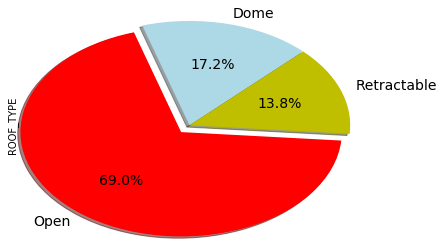

In [40]:
stadiums_nfl_df.ROOF_TYPE.groupby(stadiums_nfl_df.ROOF_TYPE).size().plot(kind='pie',explode = [0, 0.1, 0],
                                                                         autopct='%1.1f%%',
                                                                         radius=1.2, 
                                                                         startangle=45,
                                                                         colors=['LightBlue','R','Y'],
                                                                         shadow=True, fontsize=14)


#plt.title('ROOF_TYPE')
plt.savefig("ROOF_TYPEpie.png",bbox_inches='tight')
plt.show()



In [41]:
#stadiums_merge_df = pd.concat([stadiums_nfl_df, stadiums_score_df], axis=1)

stadiums_score_df['schedule_season'] = stadiums_score_df['schedule_season'].astype(object)
stadiums_merge_df= pd.merge(stadiums_nfl_df, stadiums_score_df, how='left', left_on=['TEAM'], right_on=['team_home'])
stadiums_merge_df.drop(['Unnamed: 0','team_home',"COLOR 2"], axis=1, inplace=True)

stadiums_merge_df


,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR 1,schedule_date,schedule_season,score_home,score_away,stadium,win/loss
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/13/2015,2015,31.0,19.0,University of Phoenix Stadium,W
1,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/27/2015,2015,47.0,7.0,University of Phoenix Stadium,W
2,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/04/2015,2015,22.0,24.0,University of Phoenix Stadium,L
3,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/26/2015,2015,26.0,18.0,University of Phoenix Stadium,W
4,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,11/22/2015,2015,34.0,31.0,University of Phoenix Stadium,W
5,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,12/10/2015,2015,23.0,20.0,University of Phoenix Stadium,W
6,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,12/27/2015,2015,38.0,8.0,University of Phoenix Stadium,W
7,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,01/03/2016,2015,6.0,36.0,University of Phoenix Stadium,L
8,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/11/2016,2016,21.0,23.0,University of Phoenix Stadium,L
9,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/18/2016,2016,40.0,7.0,University of Phoenix Stadium,W


In [42]:
stadiums_merge_df.count()

CITY               308
TEAM               306
ROOF_TYPE          306
CAPACITY           306
LATITUDE           308
LONGITUDE          308
REGION             308
COLOR 1            307
schedule_date      296
schedule_season    296
score_home         296
score_away         296
stadium            296
win/loss           296
dtype: int64

In [43]:
#stadiums_merge_df[pd.notnull(stadiums_merge_df["schedule_date"])]


stadiums_merge_df.rename(columns={'COLOR 1':'COLOR1', 'COLOR 2':'COLOR2','win/loss': 'WIN_LOSS','schedule_date':'SCHEDULE DATE',
                                 'schedule_season':'SCHEDULE SEASON','team_home':'TEAM HOME','score_home':'HOME SCORE',
                                  'stadium':'STADIUM','score_away':'AWAY SCORE'}, inplace=True)

#df[pd.notnull(df['A']) 



stadiums_merge_df.head()


,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR1,SCHEDULE DATE,SCHEDULE SEASON,HOME SCORE,AWAY SCORE,STADIUM,WIN_LOSS
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/13/2015,2015,31.0,19.0,University of Phoenix Stadium,W
1,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/27/2015,2015,47.0,7.0,University of Phoenix Stadium,W
2,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/04/2015,2015,22.0,24.0,University of Phoenix Stadium,L
3,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/26/2015,2015,26.0,18.0,University of Phoenix Stadium,W
4,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,11/22/2015,2015,34.0,31.0,University of Phoenix Stadium,W


In [44]:
stadiums_merge_wo_nan_df = stadiums_merge_df.dropna()

stadiums_merge_wo_nan_df.head()

,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR1,SCHEDULE DATE,SCHEDULE SEASON,HOME SCORE,AWAY SCORE,STADIUM,WIN_LOSS
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/13/2015,2015,31.0,19.0,University of Phoenix Stadium,W
1,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,09/27/2015,2015,47.0,7.0,University of Phoenix Stadium,W
2,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/04/2015,2015,22.0,24.0,University of Phoenix Stadium,L
3,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,10/26/2015,2015,26.0,18.0,University of Phoenix Stadium,W
4,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,11/22/2015,2015,34.0,31.0,University of Phoenix Stadium,W


In [45]:
stadiums_merge_wo_nan_df.count()

CITY               296
TEAM               296
ROOF_TYPE          296
CAPACITY           296
LATITUDE           296
LONGITUDE          296
REGION             296
COLOR1             296
SCHEDULE DATE      296
SCHEDULE SEASON    296
HOME SCORE         296
AWAY SCORE         296
STADIUM            296
WIN_LOSS           296
dtype: int64

In [46]:

stadiums_merge_wo_nan_df.to_csv("stadiums_merge_type.csv", index=False, header=True)



In [47]:
file_three = "weather_data.csv"

file_three_df = pd.read_csv(file_three)

file_three_df.head()

,Unnamed: 0,weather_key,Game Date,City,Temperature,Weather,Code
0,0,Glendale-42260,9/13/2015,Glendale,103,Partly cloudy,116
1,1,Glendale-42274,9/27/2015,Glendale,103,Clear,113
2,2,Glendale-42281,10/4/2015,Glendale,84,Clear,113
3,3,Glendale-42303,10/26/2015,Glendale,88,Clear,113
4,4,Glendale-42330,11/22/2015,Glendale,67,Clear,113


In [48]:
#bigdata = pd.concat([data1, data2], ignore_index=True)

#df_row_merged = pd.concat([df_a, df_b], ignore_index=True)

#stadiums_merge_wo_nan_df_wKey = pd.concat([file_three_dfCity, file_three_df_code])

#stadiums_merge_wo_nan_df_wKey


#df_col_merged =pd.concat([df_a, df_b], axis=1)


#stadiums_merge_df= pd.merge(stadiums_merge_wo_nan_df, file_three_df, how='left', left_on=['CITY'], right_on=['City'])
#stadiums_merge_df



In [49]:
file_four = "stadiums_w_weather.csv"

stadiums_merge_df = pd.read_csv(file_four)

stadiums_merge_df


,stadiums_key,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR1,SCHEDULE DATE,SCHEDULE SEASON,HOME SCORE,AWAY SCORE,STADIUM,WIN_LOSS,Temperature,Weather,Code
0,Glendale-42260,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,9/13/2015,2015,31,19,University of Phoenix Stadium,W,103,Partly cloudy,116
1,Glendale-42274,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,9/27/2015,2015,47,7,University of Phoenix Stadium,W,103,Clear,113
2,Glendale-42281,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,10/4/2015,2015,22,24,University of Phoenix Stadium,L,84,Clear,113
3,Glendale-42303,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,10/26/2015,2015,26,18,University of Phoenix Stadium,W,88,Clear,113
4,Glendale-42330,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,11/22/2015,2015,34,31,University of Phoenix Stadium,W,67,Clear,113
5,Glendale-42348,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,12/10/2015,2015,23,20,University of Phoenix Stadium,W,72,Clear,113
6,Glendale-42365,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,12/27/2015,2015,38,8,University of Phoenix Stadium,W,56,Clear,113
7,Glendale-42372,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,1/3/2016,2015,6,36,University of Phoenix Stadium,L,68,Cloudy,119
8,Glendale-42624,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,9/11/2016,2016,21,23,University of Phoenix Stadium,L,98,Clear,113
9,Glendale-42631,Glendale,Arizona Cardinals,Retractable,63400,33.52713,-112.25876,West,black,9/18/2016,2016,40,7,University of Phoenix Stadium,W,104,Clear,113


In [50]:
#R= {'schedule_season':'Schedule_Season','win/loss':'Win/Loss'}
#Total_Win_Loss= stadiums_merge_df.groupby(['schedule_season','win/loss',]).size().reset_index()#.rename(columns=R)
#Total_Win_Loss

In [51]:
#Total_Stadium_Type= stadiums_nfl_df.groupby(['CITY','ROOF_TYPE','NAME',]).size().reset_index()
#Total_Stadium_Type

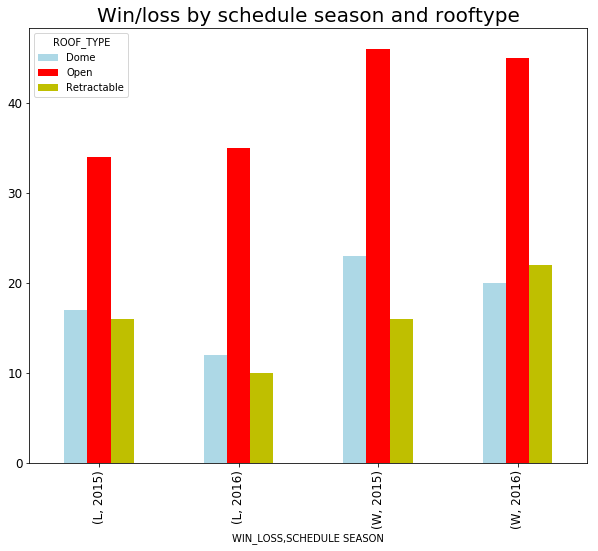

In [52]:
#bar graph 1 of 'WIN_LOSS','REGION','ROOF_TYPE' ---

Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','SCHEDULE SEASON','ROOF_TYPE']).size().unstack()

#Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],subplots = 'true',figsize=(12,10),legend=True, fontsize=12,title='Win/loss by region and rooftype')
#plt.savefig("Bargraph1.png",bbox_inches='tight')
Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],figsize=(10,8),legend=True, fontsize=12)
plt.title('Win/loss by schedule season and rooftype',fontsize = 20)
plt.savefig("Bargraph1.png",bbox_inches='tight')





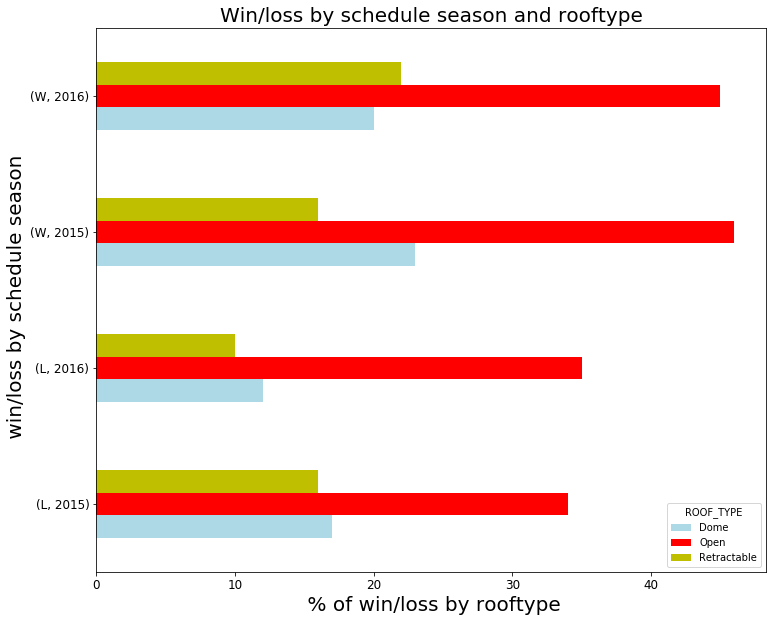

In [23]:
# Horizontal bar graph 1 of 'WIN_LOSS','REGION','ROOF_TYPE' ---


Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','SCHEDULE SEASON','ROOF_TYPE']).size().unstack()

#Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],subplots = 'true',figsize=(12,10),legend=True, 
                        #fontsize=12,title='Win/loss by year and rooftype')

#plt.savefig("HBargraph1.png",bbox_inches='tight')




Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],figsize=(12,10),legend=True, fontsize=12)
plt.title('Win/loss by schedule season and rooftype', fontsize = 20)
plt.ylabel(' win/loss by schedule season',fontsize = 20)
plt.xlabel(' % of win/loss by rooftype',fontsize = 20)
plt.savefig("HBargraph1.png",bbox_inches='tight')






In [24]:
#colors = stadiums_merge_df.groupby(['TEAM','COLOR1']).size()

colors = sorted(stadiums_merge_df.set_index('TEAM').to_dict()['COLOR1'].values())

#team_colors = list(stadiums_merge_df['COLOR1'].map(colors))
#colors = dict(tuple(stadiums_merge_df.groupby(['COLOR1'])))
colors #['Houston Texans']

['black',
 'black',
 'black',
 'black',
 'black',
 'blue',
 'darkorange',
 'darkred',
 'gold',
 'gold',
 'gold',
 'gold',
 'gray',
 'navy',
 'orange',
 'orange',
 'royalblue',
 'silver',
 'teal']

In [25]:
#x=map(colors.get,stadiums_merge_df.TEAM)

#color=map(d2c.get,df1.columns)

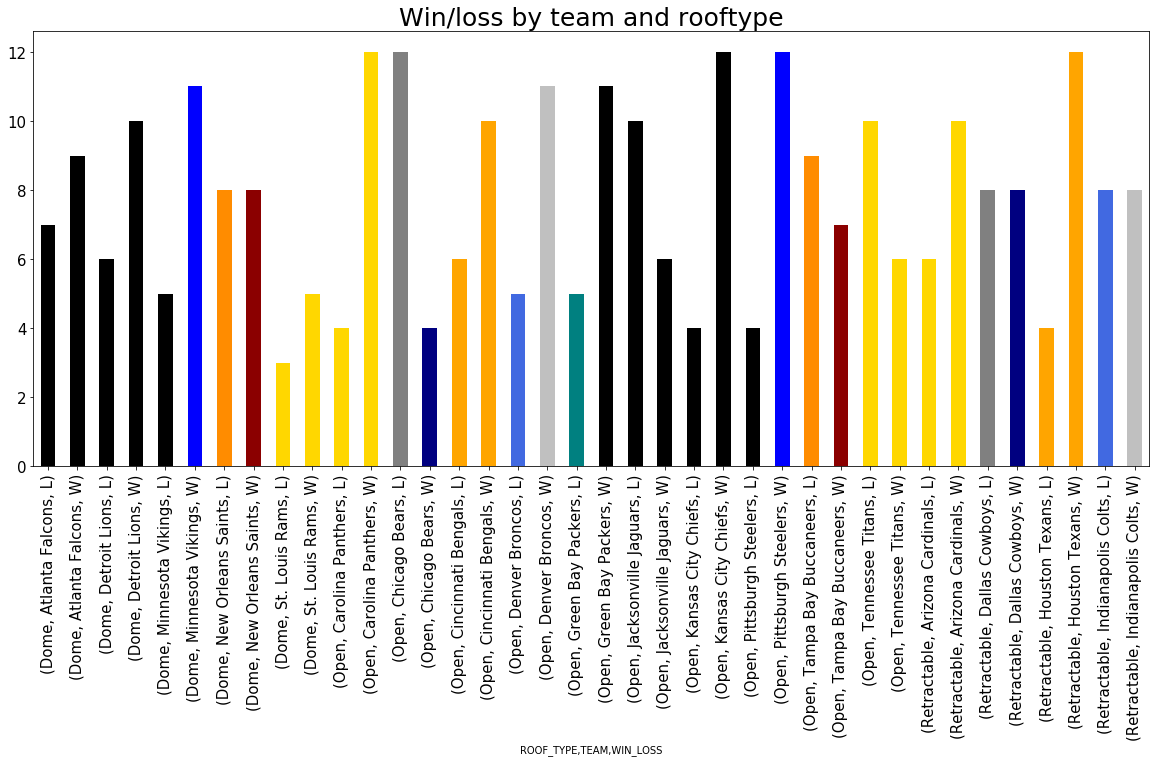

In [58]:
# bar graph 2 with --SCHEDULE SEASON, rooftype,win/loss,season ---

Bar_graph2_df=stadiums_merge_df.groupby(['ROOF_TYPE','TEAM','WIN_LOSS']).size()

#Bar_graph2_df.plot.bar(color=['LightBlue','R','Y','g'],subplots = 'true',figsize=(12,5),legend=True, 
                        #fontsize=12,title='Win/loss by rooftype and schedule season',align="center")
 
#plt.savefig("Bargraph2.png",bbox_inches='tight')

Bar_graph2_df.plot.bar(color=colors,figsize=(20,8), 
                       fontsize=15)
plt.title('Win/loss by team and rooftype',fontsize = 25)

plt.savefig("Bargraph2.png",bbox_inches='tight')



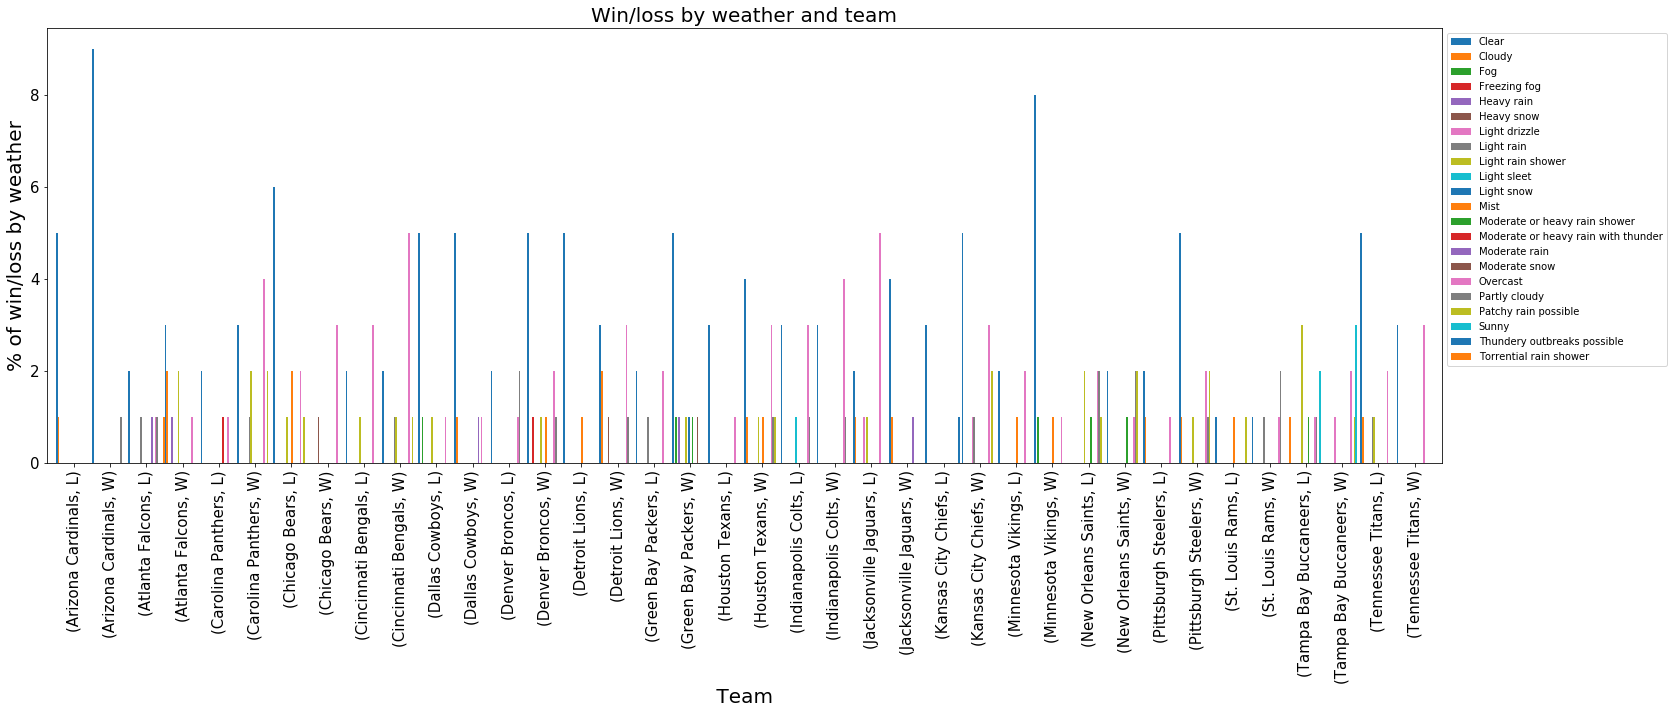

In [61]:
# Horizontal bar graph 2 with --SCHEDULE SEASON, rooftype,win/loss,season ---

Bar_graph3_df=stadiums_merge_df.groupby(['TEAM','WIN_LOSS','Weather']).size().unstack()


#Bar_graph2_df.plot.barh(color=['LightBlue','R','Y','g'],subplots = 'true',figsize=(12,10),legend=True, 
                       # fontsize=12,title='Win/loss by rooftype and schedule season',align="center")
 
#plt.savefig("HBargraph2.png",bbox_inches='tight')

Bar_graph3_df.plot.bar(figsize=(25,8),legend = True,fontsize=15,width = 1)


plt.title('Win/loss by weather and team',fontsize = 20)
plt.ylabel('% of win/loss by weather',fontsize = 20)
plt.xlabel(' Team ',fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("Bargraph3.png",bbox_inches='tight')





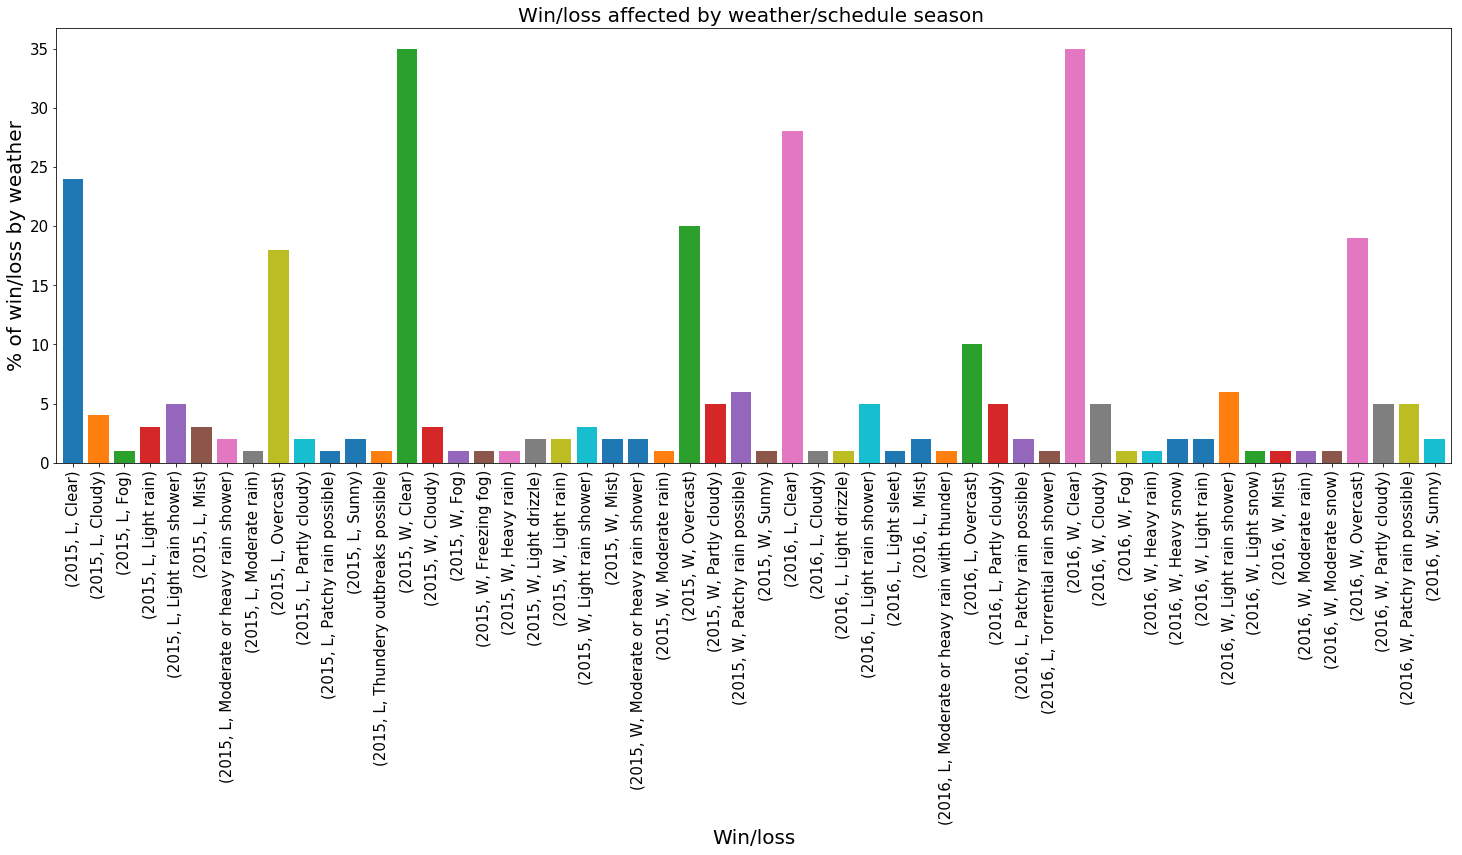

In [63]:
Bar_graph4_df=stadiums_merge_df.groupby(['SCHEDULE SEASON','WIN_LOSS','Weather',]).size()

Bar_graph4_df.plot.bar(figsize=(25,8),fontsize=15,width = .8)

plt.title('Win/loss affected by weather/schedule season ',fontsize = 20)
plt.ylabel('% of win/loss by weather',fontsize = 20)
plt.xlabel('Win/loss',fontsize = 20)
#plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("Bargraph4.png",bbox_inches='tight')

